In [1]:
import librosa
import os
import numpy as np
from tqdm import tqdm

# Define function to load and convert audio


def load_and_convert(filepath, sr=44100, n_mfcc=1000):
    """
    Loads a WAV file, converts it to MFCCs, and returns the features and sample rate.

    Args:
        filepath: Path to the WAV file.
        sr (int, optional): The target sampling rate (default: 22050).
        n_mfcc (int, optional): The number of Mel-frequency cepstral coefficients to compute (default: 20).

    Returns:
        tuple: A tuple containing the MFCC features (2D array) and the sample rate (int).
    """
    y, _ = librosa.load(filepath, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs, sr


# Define dataset paths
data_paths = {
    "training_real": "FoR\\training\\real",
    "training_fake": "FoR\\training\\fake",
    "testing_real": "FoR\\testing\\real",
    "testing_fake": "FoR\\testing\\fake",
    "validation_real": "FoR\\validation\\real",
    "validation_fake": "FoR\\validation\\fake"
}

# Create preprocessed data directory if it doesn't exist
preprocessed_dir = "preprocessed"
os.makedirs(preprocessed_dir, exist_ok=True)

# Process and save data for each category
for category, path in data_paths.items():
    category_split = category.split("_")
    category_type = category_split[0]
    category_label = category_split[1]

    for filename in tqdm(os.listdir(path), desc=f'Processing {category_label} {category_type}'):
        filepath = os.path.join(path, filename)
        if os.path.isfile(filepath) and filename.endswith(".wav"):
            mfccs, sr = load_and_convert(filepath)

            # Create filename for preprocessed data
            preprocessed_filename = os.path.splitext(
                filename)[0] + ".npz"  # Replace extension with .npz
            preprocessed_path = os.path.join(
                preprocessed_dir, category_type, category_label, preprocessed_filename)

            # Create category directory if it doesn't exist within preprocessed directory
            os.makedirs(os.path.dirname(preprocessed_path), exist_ok=True)

            # Save MFCCs and sample rate using numpy.savez
            np.savez_compressed(preprocessed_path, mfccs=mfccs, sr=sr)

print(f"Preprocessed data saved to directory: {preprocessed_dir}")

Processing fake validation: 100%|██████████| 1413/1413 [00:27<00:00, 51.81it/s]

Preprocessed data saved to directory: preprocessed


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the NPZ file
mfcc_data = np.load(
    "preprocessed\\training\\fake\\file69.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.npz")

# Extract the MFCC array with increased number of coefficients
mfcc_array = librosa.feature.mfcc(
    y=None, sr=16000, S=mfcc_data['mfccs'], n_mfcc=1000)

# Calculate the inverse of the magnitude
inverse_magnitude = mfcc_array 

# Calculate the time range
# Assuming each time step is 0.01 seconds
time_range = np.arange(inverse_magnitude.shape[1]) * 0.01

# Display the inverse of the MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(inverse_magnitude, cmap='viridis', origin='lower',
           aspect='auto', extent=[0, 2, 0, 1000])  # Adjust extent for time range
plt.colorbar(label='Inverse of Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.title('Inverse Mel-frequency cepstral coefficients (MFCCs)')
# Set xticks to integer values every 0.5 seconds
plt.xticks(np.arange(0, 2.1, 1))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'preprocessed\\training\\fake\\file69.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.npz'

In [1]:
import librosa
import os
import numpy as np
from tqdm import tqdm

# Define function to load and convert audio


def load_and_convert(filepath, sr=44100, n_mfcc=1000):
    """
    Loads a WAV file, converts it to MFCCs, and returns the features and sample rate.

    Args:
        filepath: Path to the WAV file.
        sr (int, optional): The target sampling rate (default: 22050).
        n_mfcc (int, optional): The number of Mel-frequency cepstral coefficients to compute (default: 20).

    Returns:
        tuple: A tuple containing the MFCC features (2D array) and the sample rate (int).
    """
    y, _ = librosa.load(filepath, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs, sr


# Define dataset paths
data_paths = {
    "training_real": "FoR\\training\\real",
    "training_fake": "FoR\\training\\fake",
    "testing_real": "FoR\\testing\\real",
    "testing_fake": "FoR\\testing\\fake",
    "validation_real": "FoR\\validation\\real",
    "validation_fake": "FoR\\validation\\fake"
}

# Create preprocessed data directory if it doesn't exist
preprocessed_dir = "preprocessed"
os.makedirs(preprocessed_dir, exist_ok=True)

# Process and save data for each category
for category, path in data_paths.items():
    category_split = category.split("_")
    category_type = category_split[0]
    category_label = category_split[1]

    for filename in tqdm(os.listdir(path), desc=f'Processing {category_label} {category_type}'):
        filepath = os.path.join(path, filename)
        if os.path.isfile(filepath) and filename.endswith(".wav"):
            mfccs, sr = load_and_convert(filepath)

            # Create filename for preprocessed data
            preprocessed_filename = os.path.splitext(
                filename)[0] + ".npy"  # Replace extension with .npy
            preprocessed_path = os.path.join(
                preprocessed_dir, category_type, category_label, preprocessed_filename)

            # Create category directory if it doesn't exist within preprocessed directory
            os.makedirs(os.path.dirname(preprocessed_path), exist_ok=True)

            # Save MFCCs using numpy.save
            np.save(preprocessed_path, mfccs)

print(f"Preprocessed data saved to directory: {preprocessed_dir}")

Processing fake validation: 100%|██████████| 1413/1413 [00:25<00:00, 56.38it/s]

Preprocessed data saved to directory: preprocessed


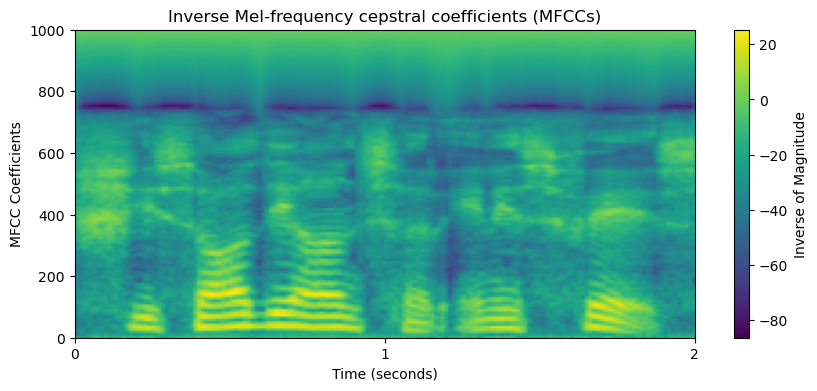

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the NPZ file
mfcc_data = np.load(
    "preprocessed\\training\\real\\file34528.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.npy")

# Extract the MFCC array with increased number of coefficients
mfcc_array = librosa.feature.mfcc(
    y=None, sr=16000, S=mfcc_data, n_mfcc=1000)

# Calculate the inverse of the magnitude
inverse_magnitude = mfcc_array

# Calculate the time range
# Assuming each time step is 0.01 seconds
time_range = np.arange(inverse_magnitude.shape[1]) * 0.01

# Display the inverse of the MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(inverse_magnitude, cmap='viridis', origin='lower',
           aspect='auto', extent=[0, 2, 0, 1000])  # Adjust extent for time range
plt.colorbar(label='Inverse of Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.title('Inverse Mel-frequency cepstral coefficients (MFCCs)')
# Set xticks to integer values every 0.5 seconds
plt.xticks(np.arange(0, 2.1, 1))
plt.show()